In [1]:
import torch as t
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

t.manual_seed(2017)

In [2]:
# 读入数据 x 和 y
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
                    [9.779], [6.182], [7.59], [2.167], [7.042],
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
                    [3.366], [2.596], [2.53], [1.221], [2.827],
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

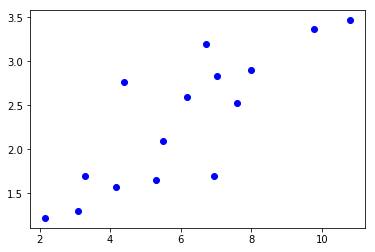

In [3]:
#画出图像
plt.plot(x_train, y_train, 'bo')

In [4]:
#转换成tensor
x_train = t.from_numpy(x_train)
y_train = t.from_numpy(y_train)

In [5]:
#初始化参数w，b
w = t.randn(1, requires_grad = True)
b = t.zeros(1, requires_grad = True)

In [6]:
#构建线性回归模型
def linear_modle(x, w, b):
    y_hat = w * x + b
    return y_hat

y_hat = linear_modle(x_train, w, b)

通过上面的步骤，我们已经定义好了模型，下面先看看模型的输出结果长什么样

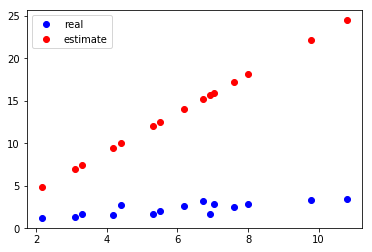

In [7]:
plt.plot(x_train.data.numpy(), y_train.data.numpy(), 'bo', label = 'real')
plt.plot(x_train.data.numpy(), y_hat.data.numpy(),'ro', label = 'estimate')
plt.legend()

这个时候需要计算我们的误差函数，也就是

$$
\frac{1}{n} \sum_{i=1}^n(\hat{y}_i - y_i)^2
$$

In [8]:
def get_loss(y_hat, y_train):
    return t.mean((y_hat - y_train) ** 2)

loss = get_loss(y_hat, y_train)
print(loss)

tensor(153.3520, grad_fn=<MeanBackward1>)


定义好了误差函数，接下来我们需要计算 w 和 b 的梯度了，这时得益于 PyTorch 的自动求导，我们不需要手动去算梯度，有兴趣的同学可以手动计算一下，w 和 b 的梯度分别是

$$
\frac{\partial}{\partial w} = \frac{2}{n} \sum_{i=1}^n x_i(w x_i + b - y_i) \\
\frac{\partial}{\partial b} = \frac{2}{n} \sum_{i=1}^n (w x_i + b - y_i)
$$

In [9]:
loss.backward()#利用自动求导求w和b的导数

In [10]:
#查看w和b的导数
print(w.grad)
print(b.grad)

tensor([161.0043])
tensor([22.8730])


In [11]:
#更新一次参数
w.data = w.data - 0.005 * w.grad.data
b.data = b.data - 0.005 * b.grad.data

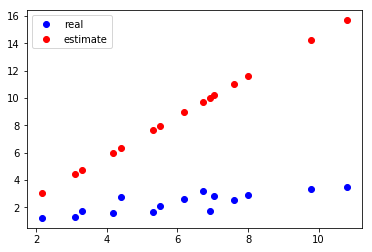

In [12]:
y_hat = linear_modle(x_train, w, b)
plt.plot(x_train.data.numpy(), y_train.data.numpy(), 'bo', label = 'real')
plt.plot(x_train.data.numpy(), y_hat.data.numpy(), 'ro', label = 'estimate')
plt.legend()

In [13]:
for e in range(10):  #进行10次更新
    y_hat = linear_modle(x_train, w, b)
    loss = get_loss(y_hat, y_train)
    
    w.grad.zero_()
    b.grad.zero_()
    
    loss.backward()
    
    w.data = w.data - 0.0001 * w.grad.data
    b.data = b.data - 0.0001 * w.grad.data
    
    print("epoch{}, loss:{}".format(e, loss.data[0]))

epoch0, loss:49.6840705871582
epoch1, loss:48.73421859741211
epoch2, loss:47.80271530151367
epoch3, loss:46.889198303222656
epoch4, loss:45.99331283569336
epoch5, loss:45.11472702026367
epoch6, loss:44.25309371948242
epoch7, loss:43.408119201660156
epoch8, loss:42.57944107055664
epoch9, loss:41.76676559448242


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:13: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  del sys.path[0]


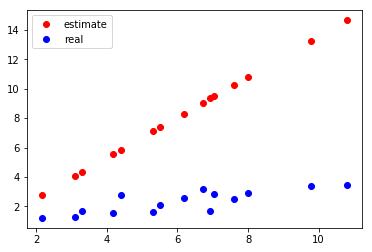

In [14]:
y_hat = linear_modle(x_train, w, b)
plt.plot(x_train.data.numpy(), y_hat.data.numpy(), 'ro', label = 'estimate')
plt.plot(x_train.data.numpy(), y_train.data.numpy(), 'bo', label = 'real')
plt.legend()

经过了10次更新，我们发现红色的预测结果已经比较好的拟合了蓝色的真实值。

## 多项式回归模型

下面我们更进一步，讲讲多项式回归。

首先我们可以先定义一个需要拟合的目标函数，这个函数是个三次的多项式。

In [15]:
#定义一个多变量函数

w_target = np.array([0.5, 3, 2.4]) #定义参数w
b_target = np.array([0.9]) #定义参数b

f_des = 'y = {:.2f} + {:.2f}* x + {:.2f} * x^2 + {:.2f} * x^3'.format(b_target[0], w_target[0], w_target[1], w_target[2])
print(f_des)

y = 0.90 + 0.50* x + 3.00 * x^2 + 2.40 * x^3


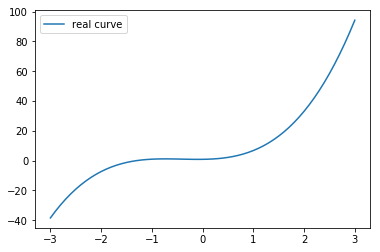

In [16]:
#画出这个函数的曲线

x_sample = np.arange(-3, 3.1, 0.1)
y_sample = b_target[0] + w_target[0] * x_sample + w_target[1] * x_sample ** 2 + w_target[2] * x_sample ** 3
plt.plot(x_sample, y_sample, label = 'real curve')
plt.legend()

接着我们可以构建数据集，需要 x 和 y，同时是一个三次多项式，所以我们取了 $x,\ x^2, x^3$

In [18]:
#构建数据集x，y
#x是一个如下矩阵 [x, x^2, x^3]
#y是函数的结果[y]

x_train = np.stack([x_sample ** i for i in range(1, 4)], axis = 1)
x_train = t.from_numpy(x_train).float() #转换成float tensor
y_train = t.from_numpy(y_sample).float().unsqueeze(1) #转换成float tensor
print(y_train.shape)
print(x_train.shape)


torch.Size([61, 1])
torch.Size([61, 3])


In [19]:
#定义参数和模型
w = t.randn(3, 1, requires_grad = True)
b = t.zeros(1).requires_grad_()

In [20]:
def multi_linear(x, w, b):
    return t.mm(x, w) + b

我们可以画出没有更新之前的模型和真实的模型之间的对比

(61,)


<function matplotlib.pyplot.legend(*args, **kwargs)>

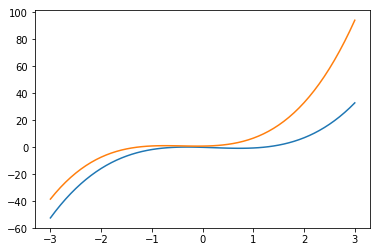

In [21]:
#画出更新之前的模型
y_pred = multi_linear(x_train, w, b)
print(x_train.data.numpy()[:,0].shape)

plt.plot(x_train.data.numpy()[:, 0], y_pred.data.numpy(), label = 'fitting curve')
plt.plot(x_train.data.numpy()[:, 0], y_sample, label = 'real curve')
plt.legend

可以发现，两条曲线之间存在差异，我们来计算一下它们之间的误差

In [22]:
loss = get_loss(y_pred, y_train)
print(loss)

tensor(413.9844, grad_fn=<MeanBackward1>)


In [23]:
loss.backward()

In [24]:
#查看一下w和b的梯度
print(w.grad)
print(b.grad)

tensor([[ -34.1391],
        [-146.6133],
        [-215.9149]])
tensor([-27.0838])


In [25]:
#更新一次参数
w.data = w.data - 1e-2 * w.grad.data
b.data = b.data - 1e-2 * b.grad.data

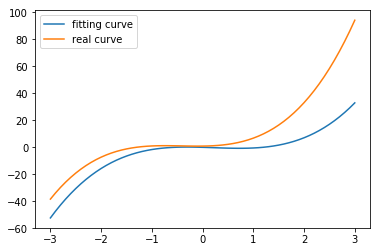

In [26]:
#画出更新一次之后的模型

plt.plot(x_train.data.numpy()[:,0], y_pred.data.numpy(), label = 'fitting curve')
plt.plot(x_train.data.numpy()[:, 0], y_sample, label = 'real curve')
plt.legend()

因为只更新的一次，所以两个曲线的差异任然存在，我们进行100次更新

In [27]:
for i in range(1, 101):
    y_pred = multi_linear(x_train, w, b)
    loss = get_loss(y_pred, y_train)
    
    w.grad.data.zero_()
    b.grad.data.zero_()
    loss.backward()
    
    w.data = w.data - 0.001 * w.grad.data
    b.data = b.data - 0.001 * b.grad.data
    
    if(i + 1) % 20 == 0:
        print('epoch{}, loss:{:0.5}'.format(i + 1, loss.data[0]))

epoch20, loss:35.759
epoch40, loss:9.107
epoch60, loss:2.8608
epoch80, loss:1.3751
epoch100, loss:1.0016


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:13: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  del sys.path[0]


可以看到更新100次之后loss已经非常小了，我们看看更新之后的曲线对比

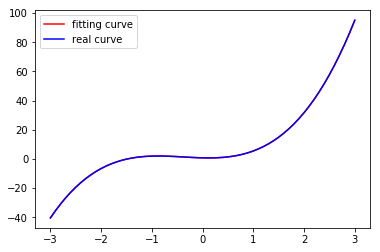

In [28]:
#画出更新之后的曲线对比

plt.plot(x_train.data.numpy()[:, 0], y_pred.data.numpy(), label = 'fitting curve', c = 'r')
plt.plot(x_train.data.numpy()[:, 0], y_pred.data.numpy(), label = 'real curve', c = 'b')
plt.legend()

可以看到更新100次之后，拟合的曲线和真实的曲线已经几乎完全重合了。

小练习：上面的例子是一个三次的多项式，尝试用一个二次的多项式去拟合它，看看最后能做到多好。

提示: 参数 w=t.randn(2, 1),同时重新构建x数据集

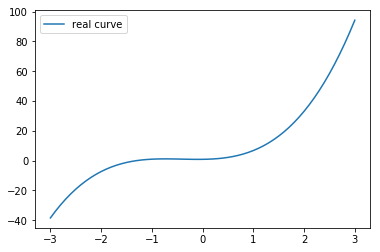

In [50]:
w_target = np.array([0.5, 3, 2.4]) #定义参数w
b_target = np.array([0.9]) #定义参数b

x_sample = np.arange(-3, 3.1, 0.1)
y_sample = b_target[0] + w_target[0] * x_sample + w_target[1] * x_sample ** 2 + w_target[2] * x_sample ** 3
plt.plot(x_sample, y_sample, label = 'real curve')
plt.legend()

In [51]:
x_train = np.stack([x_sample ** i for i in range(1,3)], axis = 1)
x_train = t.from_numpy(x_train).float()
y_train = t.from_numpy(y_sample).float().unsqueeze(1)

In [52]:
w = t.randn(2, 1, requires_grad = True)
b = t.zeros(1).requires_grad_()

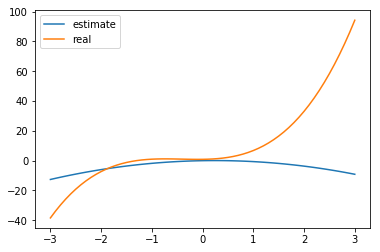

In [53]:
y_pred = multi_linear(x_train, w, b)
plt.plot(x_train.data.numpy()[:, 0], y_pred.data.numpy(), label = 'estimate')
plt.plot(x_train.data.numpy()[:, 0], y_train.data.numpy(), label = 'real')
plt.legend()

In [54]:
loss = get_loss(y_pred, y_train)
print(loss)

tensor(984.8403, grad_fn=<MeanBackward1>)


In [55]:
loss.backward()

In [56]:
print(w.grad)
print(b.grad)

tensor([[ -82.4978],
        [-151.0874]])
tensor([-27.8859])


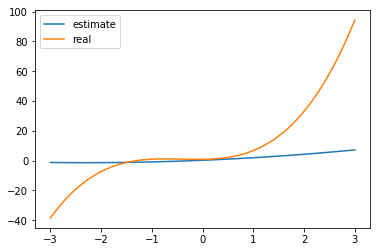

In [57]:
w.data = w.data - 1e-2 * w.grad.data
b.data = b.data - 1e-2 * b.grad.data

y_pred = multi_linear(x_train, w, b)

plt.plot(x_train.data.numpy()[:, 0], y_pred.data.numpy(), label = 'estimate')
plt.plot(x_train.data.numpy()[:, 0], y_train.data.numpy(), label = 'real')
plt.legend()

In [58]:
for i in range(1, 101):
    y_pred = multi_linear(x_train, w, b)
    
    loss = get_loss(y_pred, y_train)
    
    w.grad.data.zero_()
    b.grad.data.zero_()
    loss.backward()
    
    w.data = w.data - 0.01 * w.grad.data
    b.data = b.data - 0.01 * b.grad.data
    
    if(i + 1) % 20 == 0:
        print('epoch{}, loss:{:0.5}'.format(i + 1, loss.data[0]))

epoch20, loss:153.8
epoch40, loss:109.32
epoch60, loss:105.88
epoch80, loss:105.61
epoch100, loss:105.59


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:14: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  


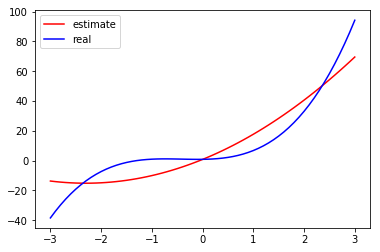

In [59]:
plt.plot(x_train.data.numpy()[:, 0], y_pred.data.numpy(), c = 'r', label = 'estimate')
plt.plot(x_train.data.numpy()[:, 0], y_train.data.numpy(), c = 'b', label = 'real')
plt.legend()